In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import utils, callbacks
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from glob import glob
import sklearn

In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
train_folder = 'kaggle/asl_alphabet_train/asl_alphabet_train'

def load_images():
    images = []
    labels = []
    index = -1
    folders = sorted(os.listdir(train_folder))
   
    for folder in folders:
        index += 1
     
        print("Loading images from folder ", folder ," has started.")
        for image in os.listdir(train_folder + '/' + folder):
            img = cv2.imread(train_folder + '/' + folder + '/' + image, 0)
            img = edge_detection(img)
            img = cv2.resize(img, (64, 64))
            img = img_to_array(img)
            images.append(img)
            labels.append(index)

    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = to_categorical(labels)

    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)

    return x_train, x_test, y_train, y_test

In [4]:
def edge_detection(image):
    minValue = 70
    blur = cv2.GaussianBlur(image,(5,5),2)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return res

In [5]:
x_train, x_test, y_train, y_test = load_images()

Loading images from folder  A  has started.
Loading images from folder  B  has started.
Loading images from folder  C  has started.
Loading images from folder  D  has started.
Loading images from folder  E  has started.
Loading images from folder  F  has started.
Loading images from folder  G  has started.
Loading images from folder  H  has started.
Loading images from folder  I  has started.
Loading images from folder  J  has started.
Loading images from folder  K  has started.
Loading images from folder  L  has started.
Loading images from folder  M  has started.
Loading images from folder  N  has started.
Loading images from folder  O  has started.
Loading images from folder  P  has started.
Loading images from folder  Q  has started.
Loading images from folder  R  has started.
Loading images from folder  S  has started.
Loading images from folder  T  has started.
Loading images from folder  U  has started.
Loading images from folder  V  has started.
Loading images from folder  W  h

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

Epoch 1/10
2447/2447 [==============================] - 282s 115ms/step - loss: 0.8606 - accuracy: 0.7374 - val_loss: 0.1526 - val_accuracy: 0.9493
Epoch 2/10
2447/2447 [==============================] - 307s 125ms/step - loss: 0.1046 - accuracy: 0.9649 - val_loss: 0.0662 - val_accuracy: 0.9789
Epoch 3/10
2447/2447 [==============================] - 300s 122ms/step - loss: 0.0568 - accuracy: 0.9808 - val_loss: 0.0849 - val_accuracy: 0.9738
Epoch 4/10
2447/2447 [==============================] - 338s 138ms/step - loss: 0.0428 - accuracy: 0.9857 - val_loss: 0.0452 - val_accuracy: 0.9844
Epoch 5/10
2447/2447 [==============================] - 289s 118ms/step - loss: 0.0316 - accuracy: 0.9897 - val_loss: 0.0319 - val_accuracy: 0.9887
Epoch 6/10
2447/2447 [==============================] - 287s 117ms/step - loss: 0.0282 - accuracy: 0.9910 - val_loss: 0.0344 - val_accuracy: 0.9880
Epoch 7/10
2447/2447 [==============================] - 309s 126ms/step - loss: 0.0196 - accuracy: 0.9937 - val_

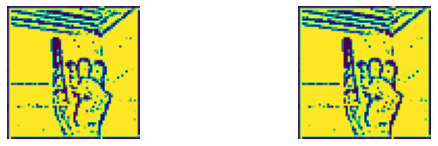

In [6]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=13)
x_test, y_test = shuffle(x_test, y_test, random_state=13)

alpha = [chr(c) for c in range(65,91)]
un,count = np.unique(y_train,return_counts=True)
j=1
plt.figure(figsize=(20,20))
for i in un:
    plt.subplot(7,4,j)
    plt.imshow(x_train[np.where(y_train == np.array(i))[0][0]])
    plt.axis('off')
    j=j+1

map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
                  10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
                  19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}

model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(29, activation='softmax')
])
model.summary()

classes = 29
epochs = 10
learning_rate = 0.0001

adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test), shuffle=True)

In [7]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [8]:
epochs=range(len(acc))

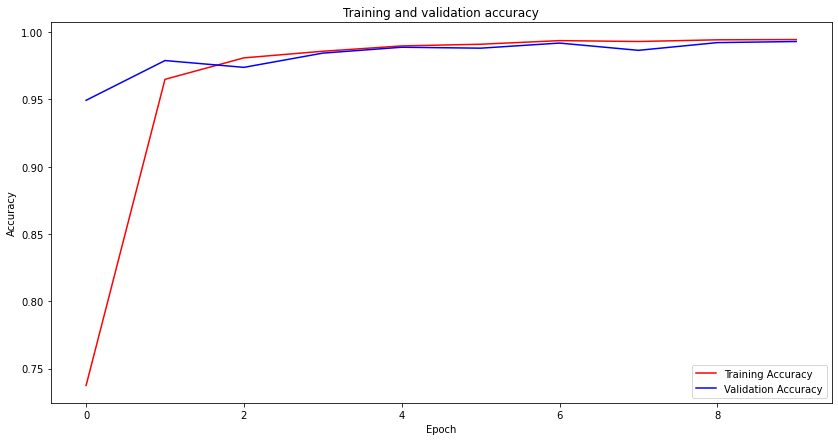

In [9]:
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

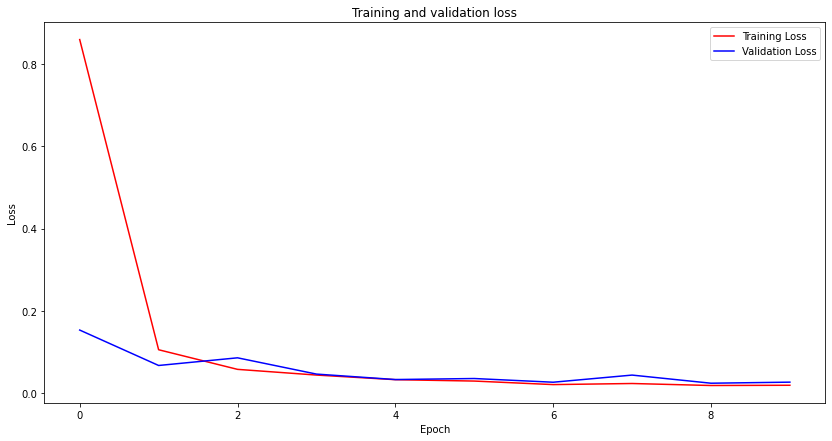

In [10]:
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [17]:
class_labels = list(map_characters.values())

score = model.evaluate(x_test,y_test, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')


Keras CNN - accuracy: 0.9929885268211365 



In [18]:
y_pred = model.predict(x_test, verbose = 1)
#print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='') 
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
report = metrics.classification_report(Y_true, Y_pred_classes, target_names=class_labels)
print(report)

272/272 [==============================] - 5s 19ms/step
              precision    recall  f1-score   support

           A       0.99      0.99      0.99       306
           B       1.00      1.00      1.00       288
           C       0.99      1.00      1.00       324
           D       1.00      1.00      1.00       296
           E       1.00      0.98      0.99       307
           F       0.97      1.00      0.99       299
           G       1.00      0.95      0.98       305
           H       1.00      0.98      0.99       313
           I       1.00      0.99      1.00       327
           J       0.96      1.00      0.98       306
           K       1.00      1.00      1.00       270
           L       1.00      0.99      1.00       279
           M       1.00      0.99      1.00       326
           N       1.00      1.00      1.00       293
           O       0.99      1.00      0.99       317
           P       0.99      1.00      0.99       303
           Q       1.00  

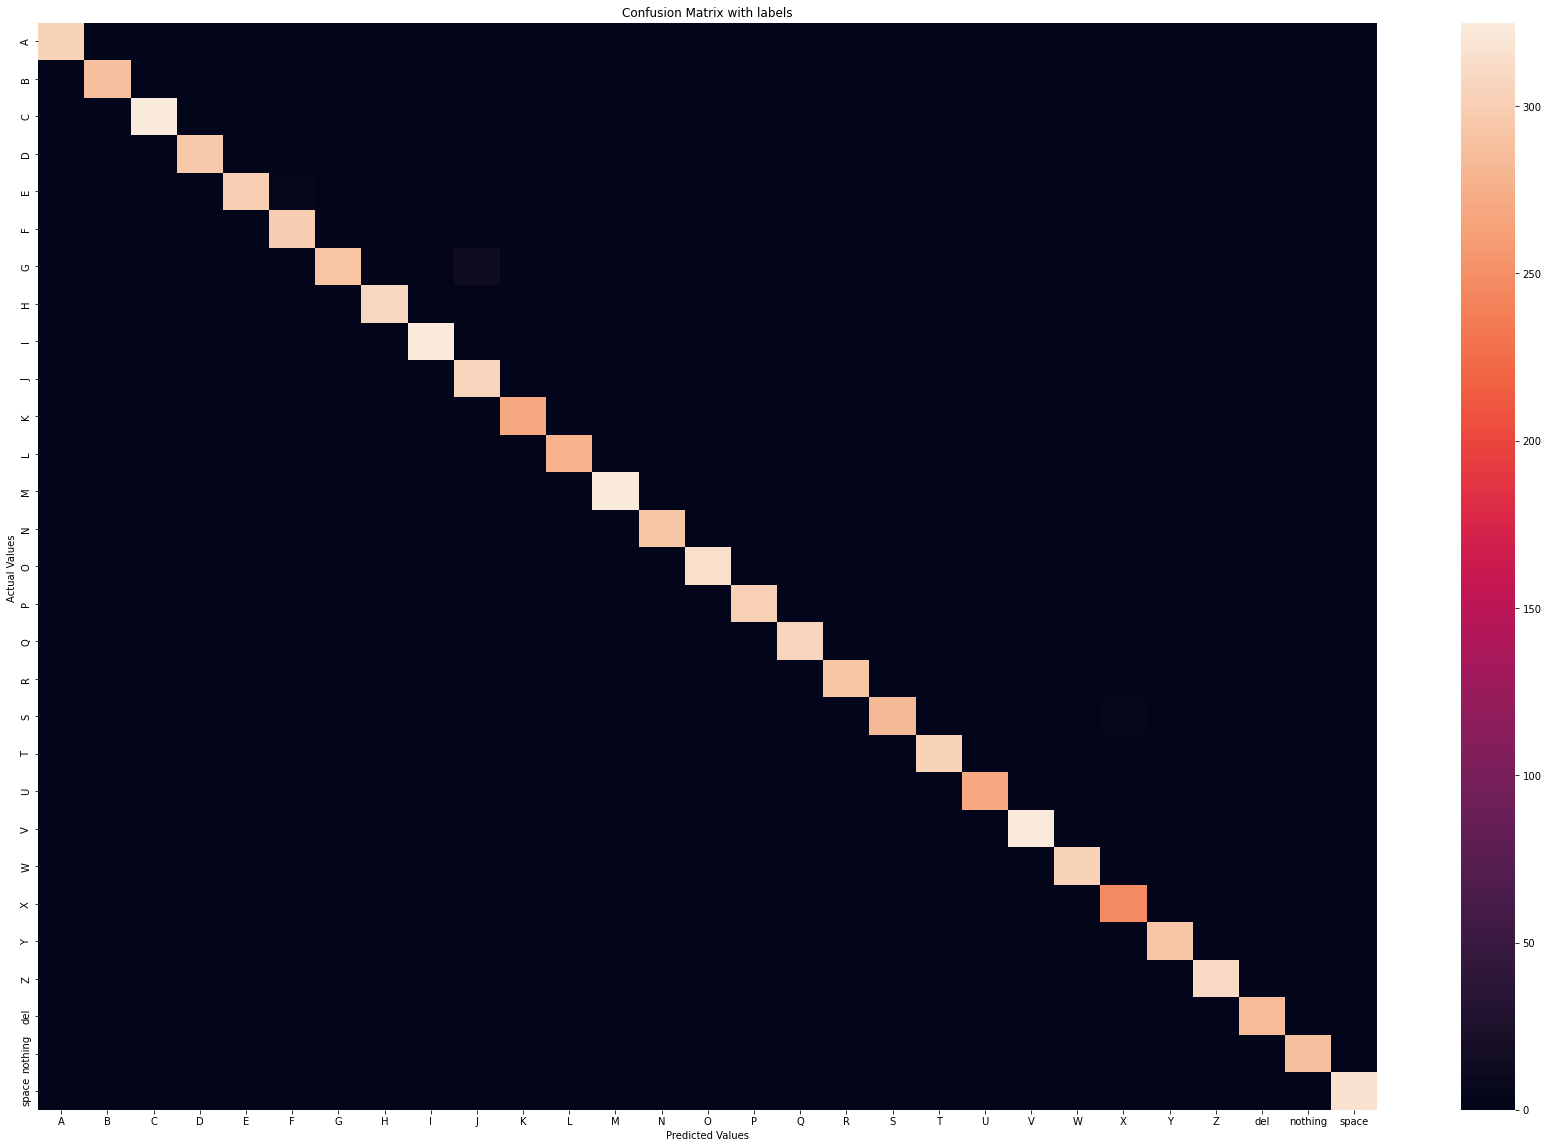

In [20]:
plt.figure(figsize=(30, 20))
ax = sns.heatmap(metrics.confusion_matrix(Y_true,Y_pred_classes))
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

plt.show()

In [21]:
confusion = metrics.confusion_matrix(Y_true,Y_pred_classes)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[304   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   2   0   0   0   0   0   0   0   0   0]
 [  0 288   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 324   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1 295   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0 300   5   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 299   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 291   0   0  12   0   0   0   0   0   2   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 308   0   0   0   0   0   0   0   2   0   0
    0   0   1   0   0   0   0   0   0   1   1]
 [  0   0   0 

In [22]:
model.save('CNNThreshold.h5')

In [24]:
from keras.models import model_from_json
json_model = model.to_json()
with open('CNNThreshold.json', 'w') as json_file:
    json_file.write(json_model)

<AxesSubplot:>

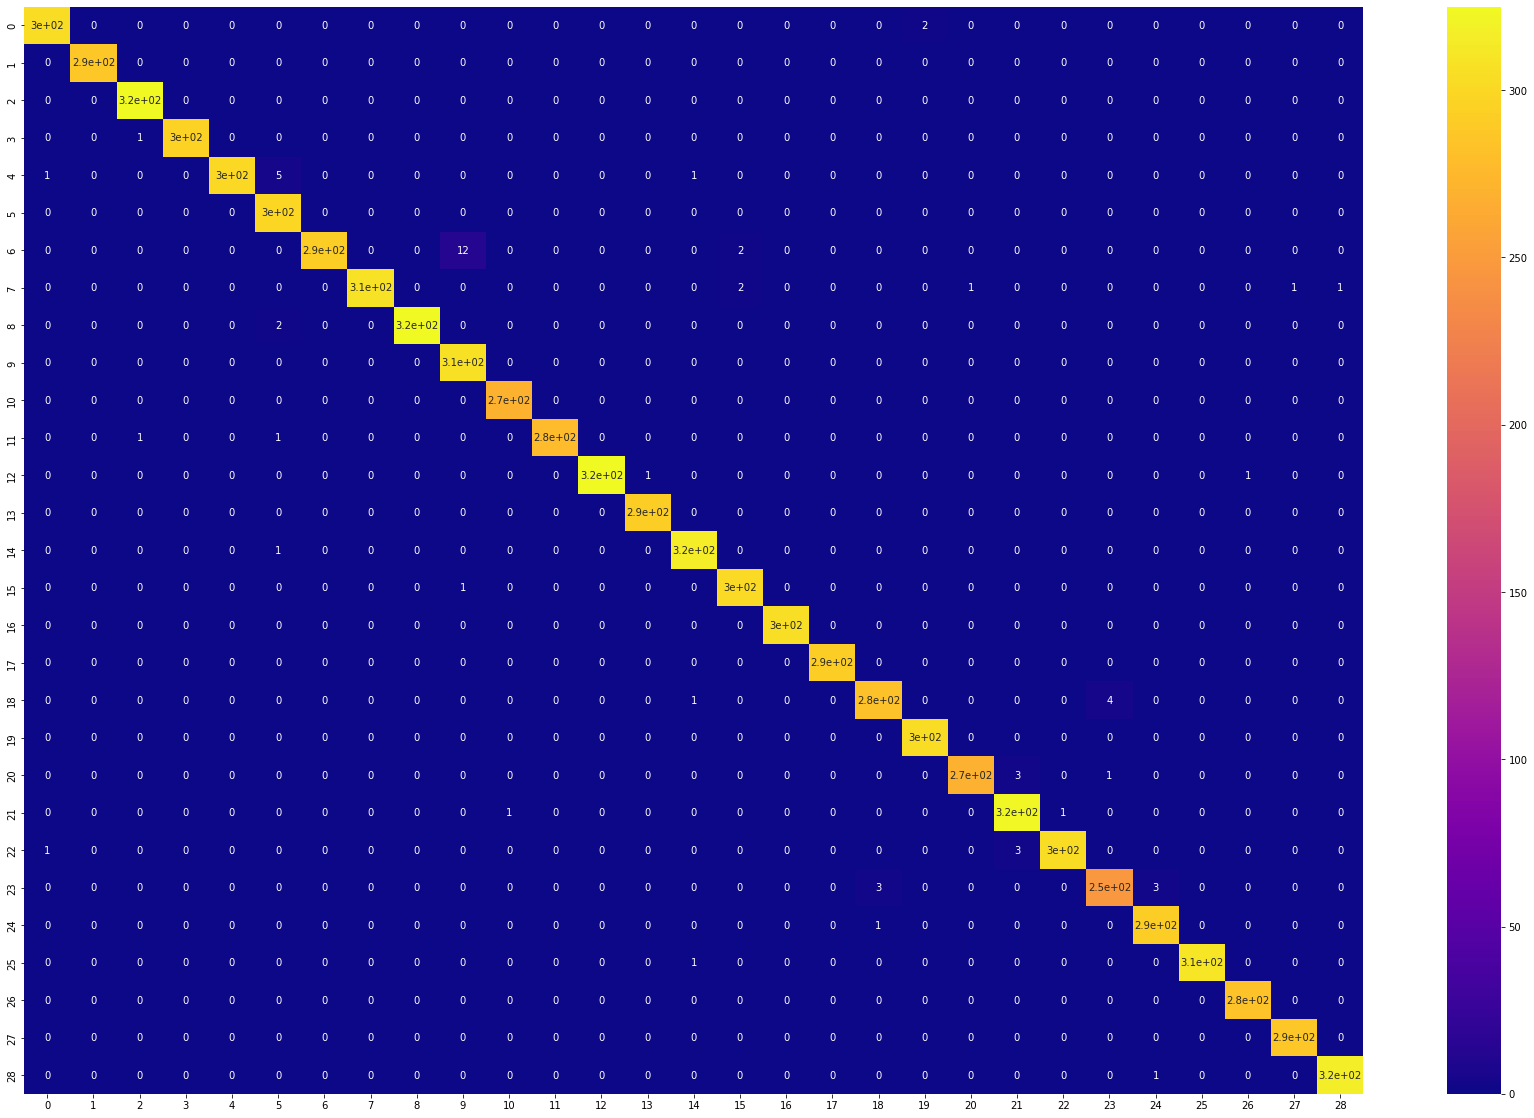

In [25]:
plt.figure(figsize=(30, 20))
sns.heatmap(confusion, cmap="plasma", annot=True)